# Ejercicio 1

En este ejercicio definiremos la función falso que unifica 3 imagenes monobanda para mostrar una imagen en falso color y posteriormente aplicaremos un corte de cola al 1%

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

LSB = cv.imread('imgpack/Landsat C/Landsat_C_02-11_B.png', cv.IMREAD_GRAYSCALE)
LSG = cv.imread('imgpack/Landsat C/Landsat_C_03-11_G.png', cv.IMREAD_GRAYSCALE)
LSR = cv.imread('imgpack/Landsat C/Landsat_C_04-11_R.png', cv.IMREAD_GRAYSCALE)
LSNIR = cv.imread('imgpack/Landsat C/Landsat_C_05-11_NIR.png', cv.IMREAD_GRAYSCALE)

In [2]:
def falso(band1, band2, band3):
    
    img3 = cv.merge((band1,band2,band3))
    
    return img3

In [3]:
CV = falso(LSR,LSG,LSB)
FC = falso(LSNIR,LSG,LSB)

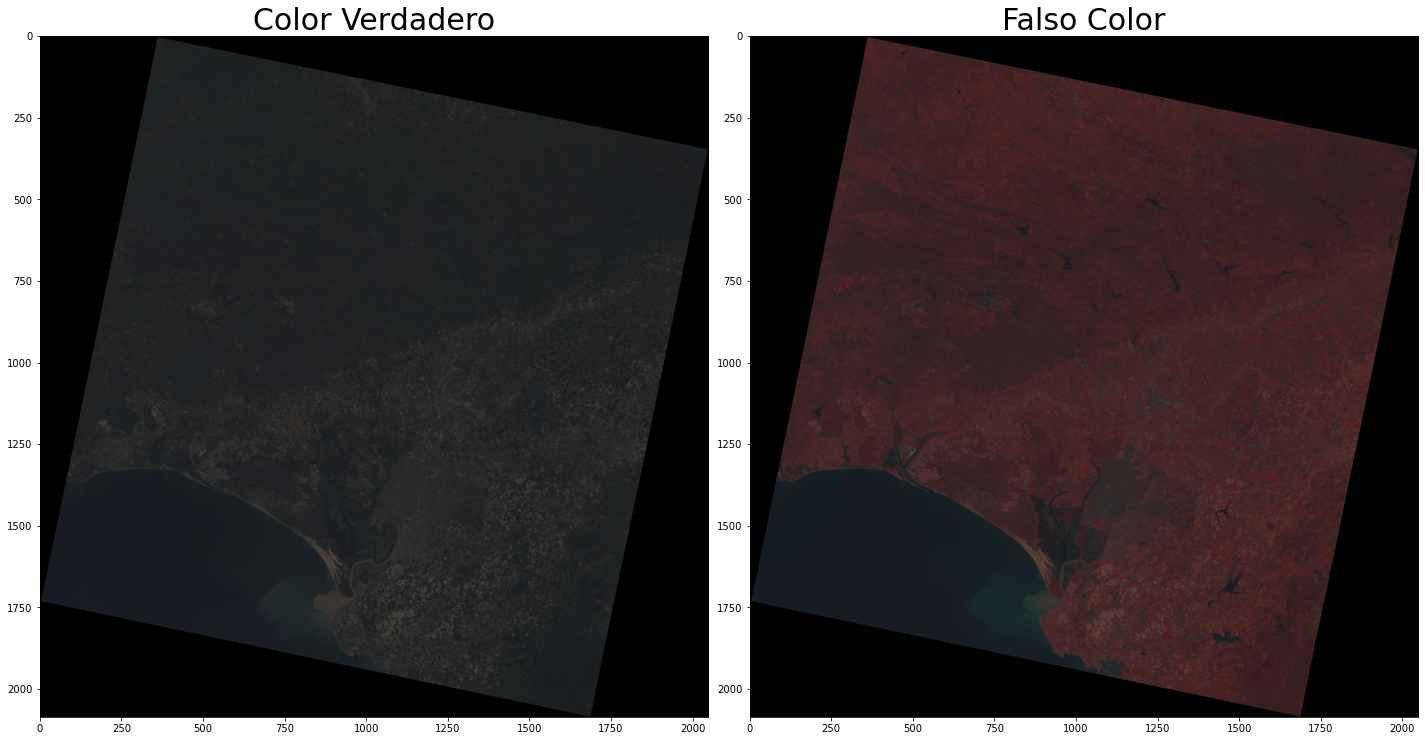

In [4]:
plt.figure(figsize=(20, 20))
plt.subplot(2, 2, 1)
plt.imshow(CV)
plt.title("Color Verdadero", fontsize = 30)

plt.subplot(2, 2, 2)
plt.imshow(FC)
plt.title("Falso Color", fontsize = 30)

plt.tight_layout()
plt.show()

In [5]:
def corte(img, porc):
    
    resimg = img.copy()
    
    hist = {i:0 for i in range(0,256)}
    for linea in resimg:
        for pixel in linea:
            hist[pixel] = hist[pixel] + 1
    
    valores = list(hist.values())
    
    numPix = img.size
    perc = (numPix*porc)
    
    n = 0
    for i in range(1,256):
        n += valores[i]
        if n > perc:
            cmin = i
            break
    
    n = 0
    for i in range(255,0,-1):
        n += valores[i]
        if n > perc:
            cmax = i
            break
    
    for a in range(resimg.shape[0]):
        for b in range(resimg.shape[1]):
            if resimg[a][b] < cmin:
                resimg[a][b] = 0
            elif resimg[a][b] > cmax:
                resimg[a][b] = 255
            else:
                resimg[a][b] = 0 + ((resimg[a][b] - cmin)/(cmax - cmin)) * (255 - 0)
    
    return resimg

In [6]:
LSBC = corte(LSB, 0.01)
LSGC = corte(LSG, 0.01)
LSRC = corte(LSR, 0.01)
LSNIRC = corte(LSNIR, 0.01)

In [7]:
CVC = falso(LSRC, LSGC, LSBC)
FCC = falso(LSNIRC, LSGC, LSBC)

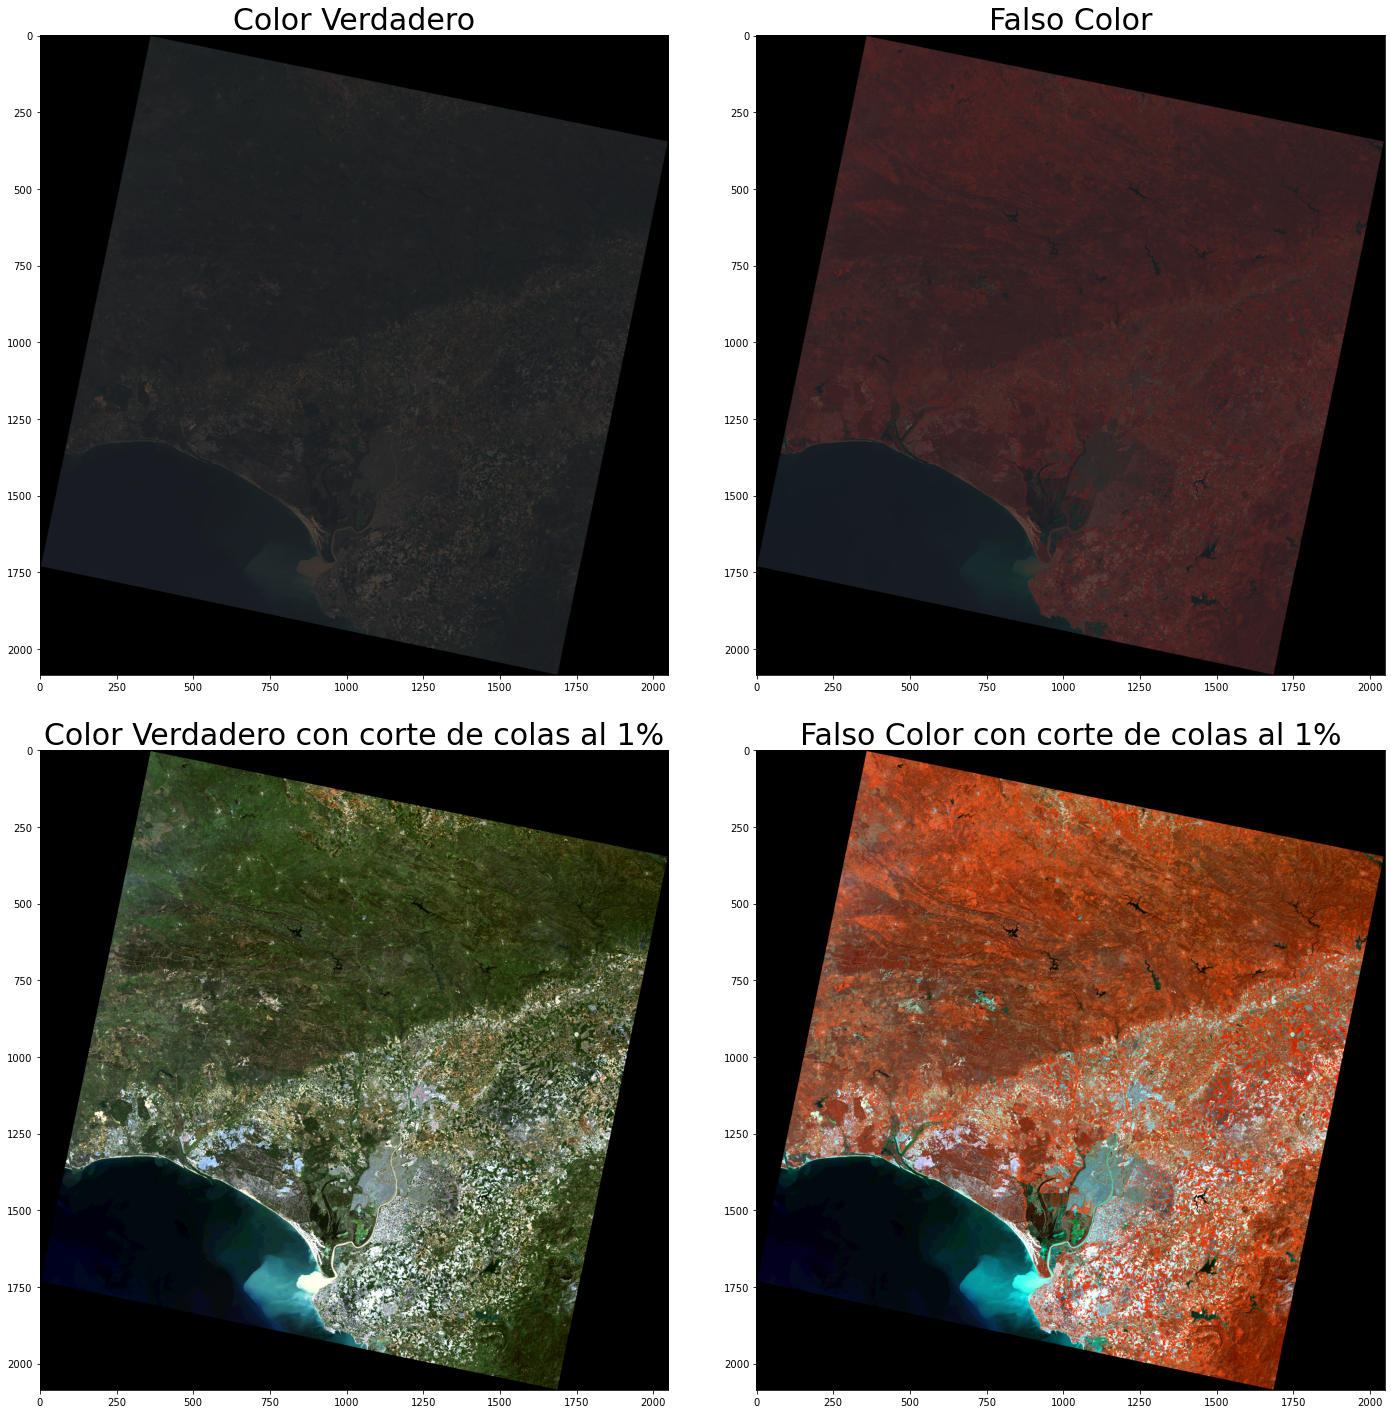

In [8]:
plt.figure(figsize=(20, 20))
plt.subplot(2, 2, 1)
plt.imshow(CV)
plt.title("Color Verdadero", fontsize = 30)

plt.subplot(2, 2, 2)
plt.imshow(FC)
plt.title("Falso Color", fontsize = 30)

plt.subplot(2, 2, 3)
plt.imshow(CVC)
plt.title("Color Verdadero con corte de colas al 1%", fontsize = 30)

plt.subplot(2, 2, 4)
plt.imshow(FCC)
plt.title("Falso Color con corte de colas al 1%", fontsize = 30)

plt.tight_layout()
plt.show()

In [9]:
# Debido a que OpenCV trabaja las imagenes en BGR al guardarlas en un archivo externo,
# debemos transformarlas a RGB

cv.imwrite("soluciones/Ej 1 - Color verdadero.png", cv.cvtColor(CV, cv.COLOR_BGR2RGB))
cv.imwrite("soluciones/Ej 1 - Falso color.png", cv.cvtColor(FC, cv.COLOR_BGR2RGB))
cv.imwrite("soluciones/Ej 1 - Color verdadero corte de colas 1%.png", cv.cvtColor(CVC, cv.COLOR_BGR2RGB))
cv.imwrite("soluciones/Ej 1 - Falso color corte de colas 1%.png", cv.cvtColor(FCC, cv.COLOR_BGR2RGB))

True